In [ ]:
"""
[機械学習の枠組み]
1. ある統計学的な現象についての不完全な情報を表す, トレーニングデータと呼ばれるデータを観測する.
2. 観測データを生成したであろうプロセスモデルをつくるため, 推論の技術を利用する.
3. そのモデルを, 事前に観測されていない標本の予測のために利用する.
"""

In [ ]:
"""
機械学習のアルゴリズムは, 教師なりか教師なしのものが考えられる.

[教師あり学習(superbised learning)]
特徴ベクトル/値のペアの集合から始める. ゴールはこれらの標本を観察し, 
前もって与えられていない特徴ベクトルに対する値を予測するための規則を導き出すことである.
- 回帰モデル
- 分類モデル

[教師なし学習(unsupervised learning)]
特徴ベクトルは与えられているが, ラベルは与えられていない. ゴールは, 特徴ベクトルの集合に隠された構造を明らかにすることである.
- クラスタリング
- 潜在変数モデル学習
"""

In [ ]:
"""
[特徴選択(feature engineering)]
単なる雑音でしかない特徴と信号になりうる有益な特徴を分離することである.
この有益な仕事を失敗すると, 悪いモデルができる. データの次元数(dimensionality)(異なる特徴の数)が標本数に対して多い時, この危険性が高くなる.
"""

In [ ]:
"""
特徴を数値に変換し、それらの数ベクトルの類似性を比較する方法はたくさんある.
同じ成分数を持つベクトルを比較するためによく使われる計量は, ミンコフスキ距離(Minkowski distance)に基づいたものである.

距離
- ミンコフスキ距離
- マンハッタン距離
- ユークリッド距離
"""

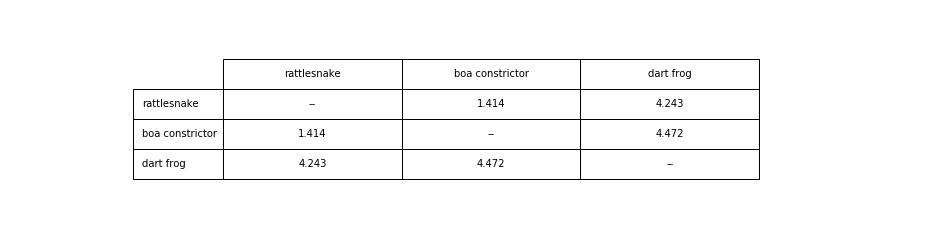

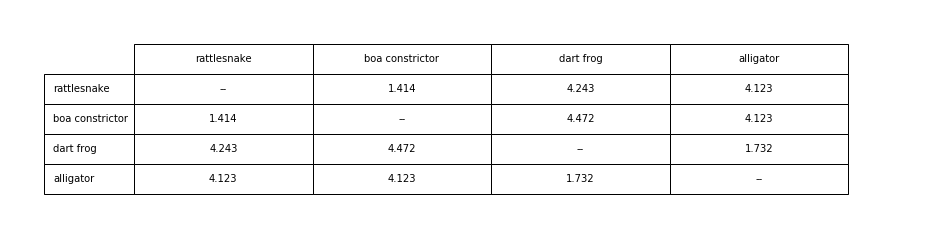

In [56]:
def minkowskiDist(v1, v2, p): 
    """v1, v2は長さの等しい数値数列であるとする
       v1, v2の, p次のミンコウスキ距離を返す"""
    dist = 0.0 
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**p
    return dist**(1/p)

import pylab

class Animal(object):
    def __init__(self, name, features):
        """nameは文字列; featuresは数値のリストとする"""
        self.name = name
        self.features = pylab.array(features)

    def getName(self):
        return self.name

    def getFeatures(self):
        return self.features

    def distance(self, other):
        """otherはAnimalオブジェクトとする
           自分自身とother間のユークリッド距離を返す"""
        return minkowskiDist(self.getFeatures(), other.getFeatures(), 2)

def compareAnimals(animals, precision):
    """animalsはAnimalオブジェクトのリスト, precisionは非負の整数とする
       それぞれのAnimal間のユークリッド距離の表をつくる"""
    # 行と列のラベルを得る
    columnLabels = []
    for a in animals:
        columnLabels.append(a.getName())
    rowLabels = columnLabels[:]
    tableVals = []
    # Animal間の距離を得る
    for a1 in animals:
        row = []
        for a2 in animals:
            if a1 == a2: 
                row.append('--')
            else:
                distance = a1.distance(a2)
                row.append(str(round(distance, precision)))
        tableVals.append(row)
    
    figure, ax = pylab.subplots(figsize=(16,4)) # draw bigger table

    # hide axes
    ax.axis('off')
    ax.axis('tight')

    table = pylab.table(
                    rowLabels = rowLabels,
                    colLabels = columnLabels,
                    cellText = tableVals,
                    cellLoc = 'center',
                    loc = 'center',
                    colWidths = [0.2]*len(animals))
    table.scale(1, 2.5) # セルの大きさを変更(水平方向の幅を変えずに高さを2.5倍数)
    table.auto_set_font_size(True)
    pylab.savefig('distances')

rattlesnake = Animal('rattlesnake', [1,1,1,1,0])
boa = Animal('boa constrictor', [0,1,0,1,0])
dartFrog = Animal('dart frog', [1,0,1,0,4])
animals = [rattlesnake, boa, dartFrog]
compareAnimals(animals, 3)

alligator = Animal('alligator', [1,1,0,1,4])
animals.append(alligator)
compareAnimals(animals, 3)

# alligatorがrattlesnakeやboaよりもdart frogに近くなっているのは, なぜか.
# 原因は特徴ベクトルの値の範囲が特徴によって異なるということである.
# ユークリッド距離を計算するとき, 足の数の分で不相応に距離が大きくなってしまう.

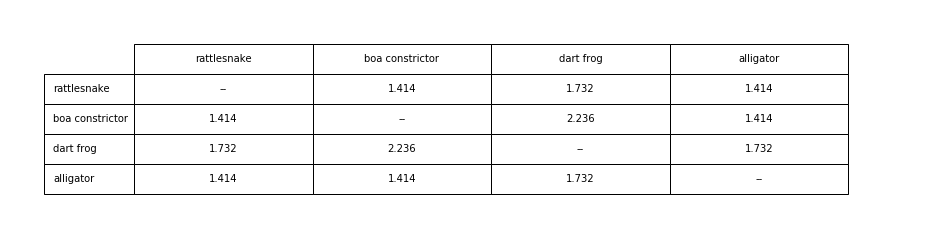

In [58]:
# 足の有無を2値にした場合にはどうなるか.
rattlesnake = Animal('rattlesnake', [1,1,1,1,0])
boa = Animal('boa constrictor', [0,1,0,1,0])
dartFrog = Animal('dart frog', [1,0,1,0,1])
alligator = Animal('alligator', [1,1,0,1,1])
animals = [rattlesnake, boa, dartFrog, alligator]
compareAnimals(animals, 3)

# この表のほうがもっともらしい